In [3]:
import matplotlib.pyplot as plt
import numpy as np


def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    """
    Draw a neural network cartoon using matplotilb.

    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])

    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    """
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)
    
    INACTIVE_COLOR = "black"
    ACTIVE_COLOR = "lightgreen"

    edges_colors = []
    nodes_colors = [[INACTIVE_COLOR for _ in range(layer_sizes[0])]]
    for i, layer_size in enumerate(layer_sizes[:-1]):
        nodes_colors.append([INACTIVE_COLOR for _ in range(layer_sizes[i + 1])])
        for node in range(layer_size):
            if nodes_colors[-2][node] == INACTIVE_COLOR and i != 0:
                edge_colors = [INACTIVE_COLOR for _ in range(layer_sizes[i + 1])]
            else:
                edge_colors = np.random.choice([INACTIVE_COLOR, ACTIVE_COLOR], layer_sizes[i + 1], replace=True, p = [0.8, 0.2])
            edges_colors.append(edge_colors)

            for j, color in enumerate(edge_colors):
                if color == ACTIVE_COLOR:
                    nodes_colors[-1][j] = ACTIVE_COLOR

            if ACTIVE_COLOR in edge_colors:
                nodes_colors[-2][node] = ACTIVE_COLOR
            elif nodes_colors[-2][node] != ACTIVE_COLOR:
                nodes_colors[-2][node] = INACTIVE_COLOR

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2.0 + (top + bottom) / 2.0
        for m in range(layer_size):
            circle = plt.Circle(
                (n * h_spacing + left, layer_top - m * v_spacing),
                v_spacing / 4.0,
                color=nodes_colors[n][m],
                ec="k",
                zorder=4,
            )
            ax.add_artist(circle)

    # Edges
    cum_size = 0
    for n, (layer_size_a, layer_size_b) in enumerate(
        zip(layer_sizes[:-1], layer_sizes[1:])
    ):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2.0 + (top + bottom) / 2.0
        layer_top_b = v_spacing * (layer_size_b - 1) / 2.0 + (top + bottom) / 2.0
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D(
                    [n * h_spacing + left, (n + 1) * h_spacing + left],
                    [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing],
                    color=edges_colors[cum_size + m][o]
                )
                ax.add_artist(line)
        cum_size += layer_size_a

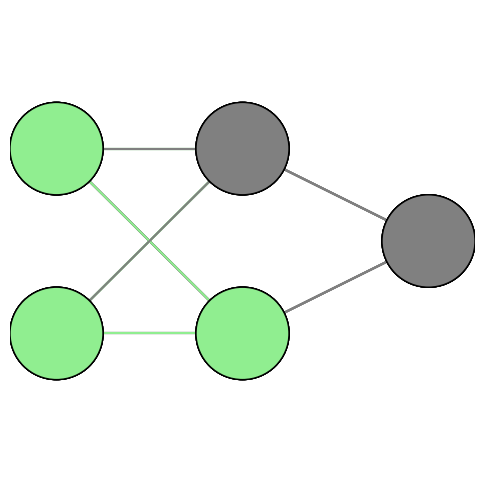

In [40]:
import matplotlib.pyplot as plt
import numpy as np


def draw_neural_net(ax, left, right, bottom, top, layer_sizes, edges_colors, nodes_colors):
    """
    Draw a neural network cartoon using matplotilb.

    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])

    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    """
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)
    

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2.0 + (top + bottom) / 2.0
        for m in range(layer_size):
            circle = plt.Circle(
                (n * h_spacing + left, layer_top - m * v_spacing),
                v_spacing / 4.0,
                color=nodes_colors[n][m],
                ec="k",
                zorder=4,
            )
            ax.add_artist(circle)

    # Edges
    cum_size = 0
    for n, (layer_size_a, layer_size_b) in enumerate(
        zip(layer_sizes[:-1], layer_sizes[1:])
    ):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2.0 + (top + bottom) / 2.0
        layer_top_b = v_spacing * (layer_size_b - 1) / 2.0 + (top + bottom) / 2.0
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D(
                    [n * h_spacing + left, (n + 1) * h_spacing + left],
                    [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing],
                    color=edges_colors[cum_size + m][o]
                )
                ax.add_artist(line)
        cum_size += layer_size_a

fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.axis('off')
ax.set_facecolor((25/255, 25/255, 25/255))

INACTIVE_COLOR = "grey"
ACTIVE_COLOR = "lightgreen"

edges_colors = [
    [[INACTIVE_COLOR, INACTIVE_COLOR], [INACTIVE_COLOR, INACTIVE_COLOR], [INACTIVE_COLOR], [INACTIVE_COLOR]],
    [[ACTIVE_COLOR, INACTIVE_COLOR], [INACTIVE_COLOR, INACTIVE_COLOR], [INACTIVE_COLOR], [INACTIVE_COLOR]],
    [[ACTIVE_COLOR, INACTIVE_COLOR], [ACTIVE_COLOR, INACTIVE_COLOR], [INACTIVE_COLOR], [INACTIVE_COLOR]],
    [[ACTIVE_COLOR, INACTIVE_COLOR], [ACTIVE_COLOR, INACTIVE_COLOR], [INACTIVE_COLOR], [INACTIVE_COLOR]],
    [[INACTIVE_COLOR, ACTIVE_COLOR], [INACTIVE_COLOR, ACTIVE_COLOR], [INACTIVE_COLOR], [INACTIVE_COLOR]],
]
nodes_colors = [
    [[ACTIVE_COLOR, INACTIVE_COLOR], [INACTIVE_COLOR, INACTIVE_COLOR], [INACTIVE_COLOR]],
    [[ACTIVE_COLOR, INACTIVE_COLOR], [INACTIVE_COLOR, INACTIVE_COLOR], [INACTIVE_COLOR]],
    [[ACTIVE_COLOR, ACTIVE_COLOR], [INACTIVE_COLOR, INACTIVE_COLOR], [INACTIVE_COLOR]],
    [[ACTIVE_COLOR, ACTIVE_COLOR], [ACTIVE_COLOR, INACTIVE_COLOR], [INACTIVE_COLOR]],
    [[ACTIVE_COLOR, ACTIVE_COLOR], [INACTIVE_COLOR, ACTIVE_COLOR], [INACTIVE_COLOR]],
]
for i, (e_colors, n_colors) in enumerate(zip(edges_colors, nodes_colors)):
    draw_neural_net(ax, .1, .9, .1, .9, [2, 2, 1], e_colors, n_colors)
    plt.savefig(f"images/step_by_step_feed_forward_animation/{i}.png", transparent=True)

In [ ]:
import os
import shutil

REPLICATES = 5
IMAGES = 100
OUT_DIR = "images/nn_animation"

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
ax.set_facecolor((25/255, 25/255, 25/255))

for i in range(IMAGES):
    draw_neural_net(ax, .1, .9, .1, .9, [4, 7, 2])  
    fig.savefig(f'{OUT_DIR}/nn{i}.png')

images = os.listdir(OUT_DIR)

for i in range(REPLICATES - 1):
    np.random.shuffle(images)
    for j, img in enumerate(images):
        new_index = (i + 1)*IMAGES + j
        new_name = f"{OUT_DIR}/nn{new_index}.png"
        shutil.copy(f"{OUT_DIR}/{img}", new_name)

# ffmpeg -framerate 24 -pattern_type glob -i 'assets/images/nn_animation*.png' -c:v libx264 -pix_fmt yuv420p assets/videos/nn_animation.mp4